# The code is split into different parts:
#### 1. Data handling 
#### 2. Tablet Hardness
#### 3. Tablet Height
#### 4. Tablet Friability
#### 5. Output of all the plots

In [67]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import matplotlib.pyplot as plt

In [68]:
filepath = 'https://raw.githubusercontent.com/MrHexeberg/AI-medical-project/refs/heads/main/Tablet%20examination%20-%20Munka1.csv'

df = pd.read_csv(filepath, skiprows = 1)
df = df.drop('Measurement', axis = 1)

df.head()

,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
0,732,146,157,81.9,5.23,0.318
1,851,110,180,91.0,4.82,0.200
2,562,197,133,59.6,5.79,0.466
3,923,122,189,96.3,4.66,0.181
4,688,154,112,74.0,5.37,0.332


In [69]:
df.describe()

,Press Force (kg),Motor Speed (tablets/min),Particle Size (μm),Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,711.440000,151.470000,151.390000,75.675000,5.296900,0.309340
std,149.542962,32.235076,31.828421,15.275096,0.473478,0.108533
min,504.000000,100.000000,100.000000,52.700000,4.500000,0.102000
25%,579.750000,118.750000,120.000000,64.375000,4.840000,0.190000
50%,676.500000,155.500000,148.000000,72.950000,5.395000,0.336000
75%,815.500000,182.250000,184.250000,88.825000,5.652500,0.410250
max,998.000000,198.000000,200.000000,100.000000,5.970000,0.466000


In [70]:
df.isnull().sum()

Press Force (kg)             0
Motor Speed (tablets/min)    0
Particle Size (μm)           0
Tablet Hardness (N)          0
Tablet Height (mm)           0
Tablet Friability (%)        0
dtype: int64

In [71]:
X = df[['Press Force (kg)', 'Motor Speed (tablets/min)', 'Particle Size (μm)']]
y = df[['Tablet Hardness (N)',	'Tablet Height (mm)',	'Tablet Friability (%)']]

In [72]:
# Splitting the dataset into training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Setup Tablet Hardness

In [ ]:
# Model Hardness
model_hardness = Sequential(
    [
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation = "linear")   # Output neuron
    ]
)


In [75]:
# Model Hardness
model_hardness.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [76]:
# Making two arrays of the y_train and y_test values for the tablet hardness
y_train_hardness = np.array([x[0] for x in y_train.values])
y_test_hardness = np.array([x[0] for x in y_test.values])

### Training the model for Tablet Hardness

In [77]:
history_hardness = model_hardness.fit(X_train_scaled, y_train_hardness,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1                    
                    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 5593.0747 - val_loss: 4355.3936
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3650.9207 - val_loss: 2296.7041
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1317.7378 - val_loss: 578.8422
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 625.9873 - val_loss: 528.5913
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 778.0849 - val_loss: 189.1836
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 285.8305 - val_loss: 830.4480
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 399.0143 - val_loss: 38.8650
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 76.0606 - val_loss: 85.5397
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 92.0501 - val_loss: 19.9268
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 39.1465 - val_loss: 101.6358
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 71.0266 - val_loss: 39.5489
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━

In [78]:
# Evaluation of the model for tablet hardness
y_pred_hardness = model_hardness.predict(X_test_scaled)
rmse_hardness = root_mean_squared_error(y_test_hardness, y_pred_hardness)
r2_hardness = r2_score(y_test_hardness, y_pred_hardness)
print('rmse: ', rmse_hardness)
print('r2 score: ', r2_hardness)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
rmse:  1.277492434216937
r2 score:  0.9926525930904939


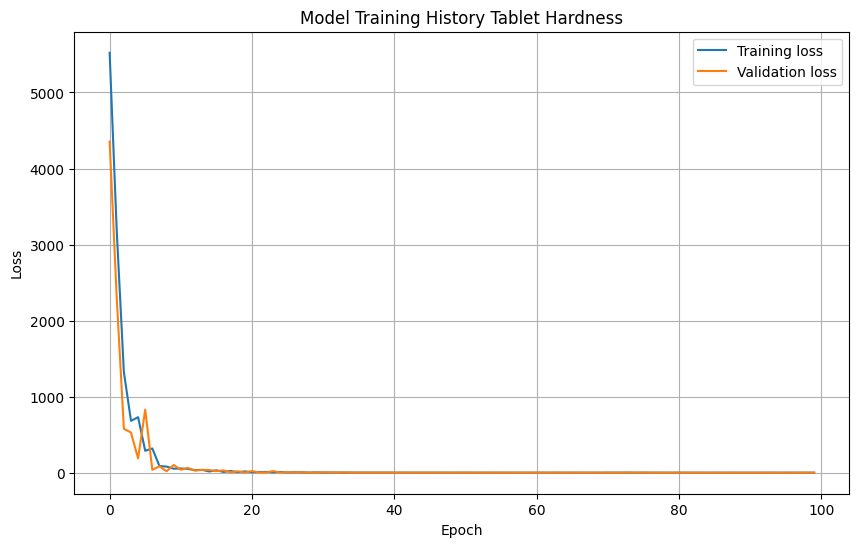

In [79]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(history_hardness.history['loss'], label = 'Training loss')
plt.plot(history_hardness.history['val_loss'], label = 'Validation loss')
plt.title('Model Training History Tablet Hardness')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

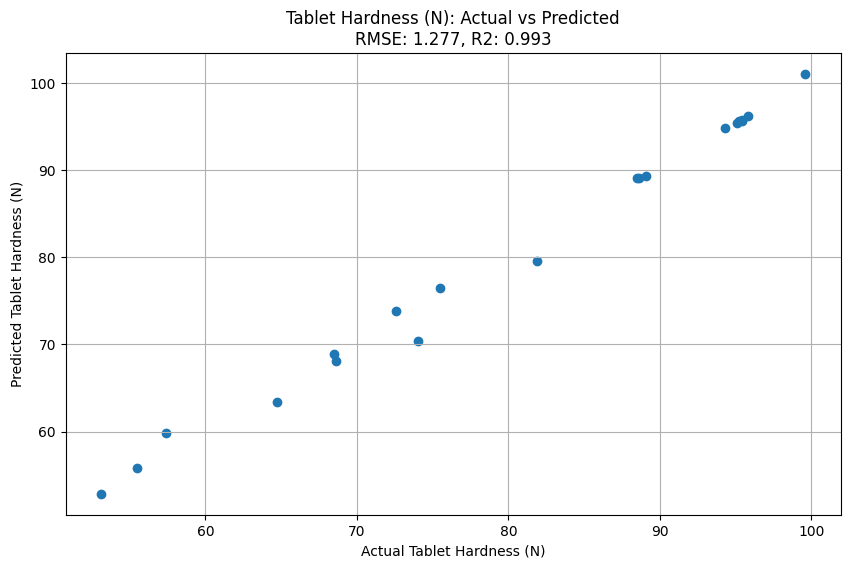

In [80]:
plt.figure(figsize=(10,6))
col = 'Tablet Hardness (N)'
plt.scatter(y_test[col], y_pred_hardness)
plt.xlabel(f'Actual {col}')
plt.ylabel(f'Predicted {col}')
plt.title(f'{col}: Actual vs Predicted\nRMSE: {rmse_hardness:.3f}, R2: {r2_hardness:.3f}')
plt.grid()

# 3. Tablet Height

In [ ]:
# Model Height
model_height = Sequential(
    [
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation = "linear")   # Output neuron
    ]
)


In [82]:
# Model Height
model_height.compile(optimizer=Adam(learning_rate=0.1), loss='mse')

In [83]:
# Making two arrays of the y_train and y_test values for the tablet height
y_train_height = np.array([x[1] for x in y_train.values])
y_test_height = np.array([x[1] for x in y_test.values])

### Training the model for Tablet Height

In [84]:
history_height = model_height.fit(X_train_scaled, y_train_height,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1                    
                    )

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 22.6455 - val_loss: 15.0415
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.1377 - val_loss: 8.9104
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.5158 - val_loss: 15.9113
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.8411 - val_loss: 1.2631
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.9173 - val_loss: 3.1546
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5287 - val_loss: 0.2016
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6623 - val_loss: 2.9590
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8044 - val_loss: 0.0516
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2046 - val_loss: 0.9346
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9643 - val_loss: 0.4062
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2612 - val_loss: 0.2138
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3947 - va

In [85]:
# Evaluation of the model for tablet height
y_pred_height = model_height.predict(X_test_scaled)
rmse_height = root_mean_squared_error(y_test_height, y_pred_height)
r2_height = r2_score(y_test_height, y_pred_height)
print('rmse: ', rmse_height)
print('r2 score: ', r2_height)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
rmse:  0.025566513397828342
r2 score:  0.9970289972225135


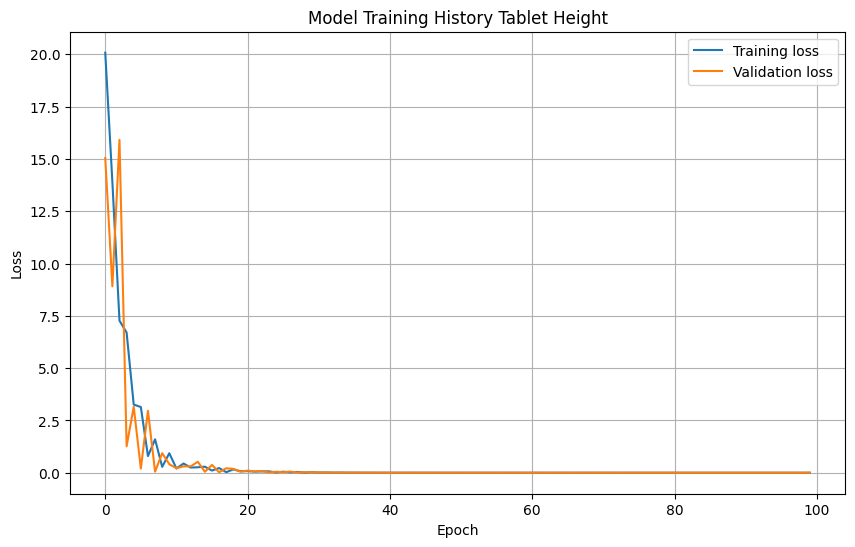

In [86]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(history_height.history['loss'], label = 'Training loss')
plt.plot(history_height.history['val_loss'], label = 'Validation loss')
plt.title('Model Training History Tablet Height')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

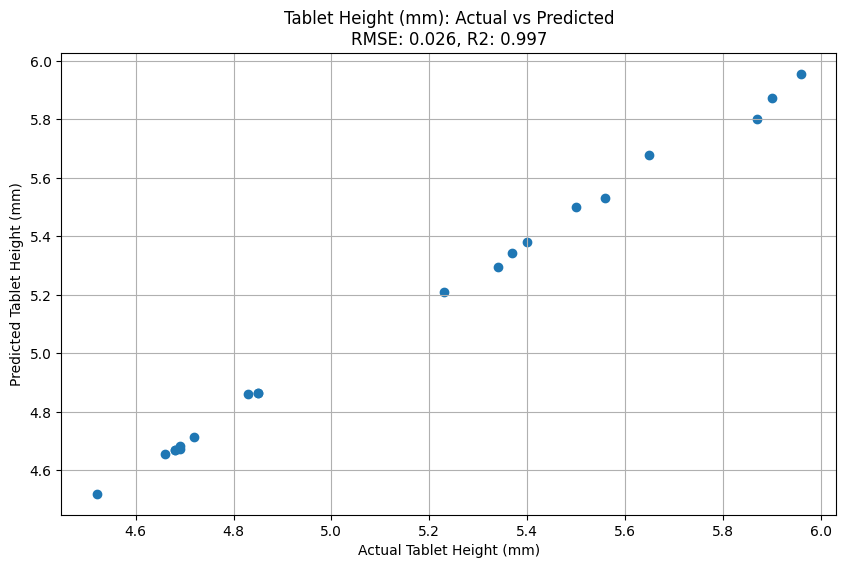

In [87]:
plt.figure(figsize=(10,6))
col = 'Tablet Height (mm)'
plt.scatter(y_test[col], y_pred_height)
plt.xlabel(f'Actual {col}')
plt.ylabel(f'Predicted {col}')
plt.title(f'{col}: Actual vs Predicted\nRMSE: {rmse_height:.3f}, R2: {r2_height:.3f}')
plt.grid()

# Setup Tablet Friability

In [ ]:
# Model Friability
model_friability = Sequential(
    [
        Dense(64, activation='relu', input_shape=(3,)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation = "linear")   # Output neuron
    ]
)

In [89]:
model_friability.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [90]:
scaling_factor = 10

In [91]:
# Making two arrays of the y_train and y_test values for the tablet friability
y_train_friability = np.array([x[2] for x in y_train.values]) * scaling_factor
y_test_friability = np.array([x[2] for x in y_test.values]) * scaling_factor

### Training the model for Tablet Friability

In [92]:
history_friability = model_friability.fit(X_train_scaled, y_train_friability,
                    epochs=100,
                    batch_size=48,
                    validation_split=0.2,
                    verbose=1                    
                    )

Epoch 1/100


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 11.8300 - val_loss: 8.2679
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.9749 - val_loss: 6.5764
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9238 - val_loss: 4.4577
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3383 - val_loss: 2.8304
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6402 - val_loss: 3.1379
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.0047 - val_loss: 4.1114
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.0831 - val_loss: 2.3330
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9940 - val_loss: 0.9991
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2592 - val_loss: 0.7533
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2271 - val_loss: 0.7949
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3054 - val_loss: 0.7547
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0957 - val_loss: 0.6657


In [93]:
# Evaluation of the model for tablet friability
y_pred_friability = model_friability.predict(X_test_scaled)
rmse_friability = root_mean_squared_error(y_test_friability, y_pred_friability)
r2_friability = r2_score(y_test_friability, y_pred_friability)
y_pred_friability /= scaling_factor

print('rmse: ', rmse_friability)
print('r2 score: ', r2_friability)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
rmse:  0.18285715195103527
r2 score:  0.969603207229357


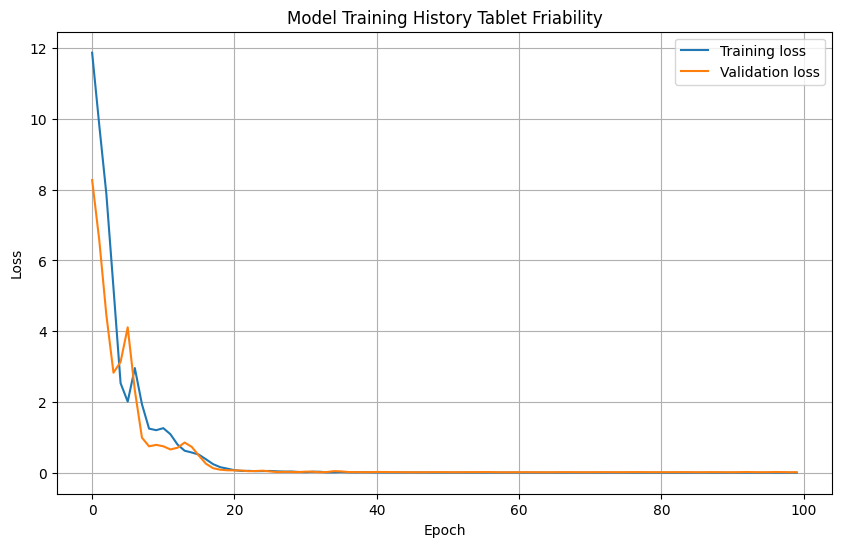

In [94]:
# Visualizing
plt.figure(figsize=(10,6))
plt.plot(history_friability.history['loss'], label = 'Training loss')
plt.plot(history_friability.history['val_loss'], label = 'Validation loss')
plt.title('Model Training History Tablet Friability')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

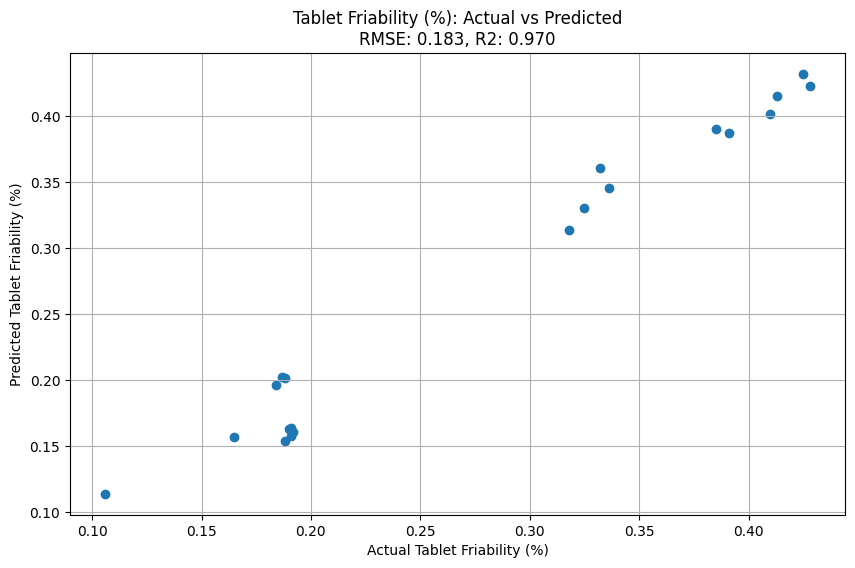

In [95]:
plt.figure(figsize=(10,6))
col = 'Tablet Friability (%)'
plt.scatter(y_test[col], y_pred_friability)
plt.xlabel(f'Actual {col}')
plt.ylabel(f'Predicted {col}')
plt.title(f'{col}: Actual vs Predicted\nRMSE: {rmse_friability:.3f}, R2: {r2_friability:.3f}')
plt.grid()

# Output of the models

#### Making an array for each of the output parameters to store in a dataframe

In [96]:
hardness = np.zeros(len(y_pred_hardness))
height = np.zeros(len(y_pred_height))
friability = np.zeros(len(y_pred_friability))

for i in range(0, len(y_pred_hardness)):
    hardness[i] = y_pred_hardness[i][0]
    height[i] = y_pred_height[i][0]
    friability[i] = y_pred_friability[i][0]


In [97]:
pred_df = pd.DataFrame({'Tablet Hardness (N)': hardness,
                          'Tablet Height (mm)': height,
                          'Tablet Friability (%)': friability})

pred_df

,Tablet Hardness (N),Tablet Height (mm),Tablet Friability (%)
0,96.286293,4.656750,0.153751
1,94.836639,4.713918,0.156868
2,95.697227,4.669311,0.163196
3,73.857109,5.381581,0.345540
4,95.690376,4.671508,0.162635
5,55.779598,5.870803,0.422821
6,68.930557,5.500348,0.390065
7,68.142456,5.529836,0.387215
8,89.138603,4.863791,0.202123
9,79.600983,5.208442,0.313858


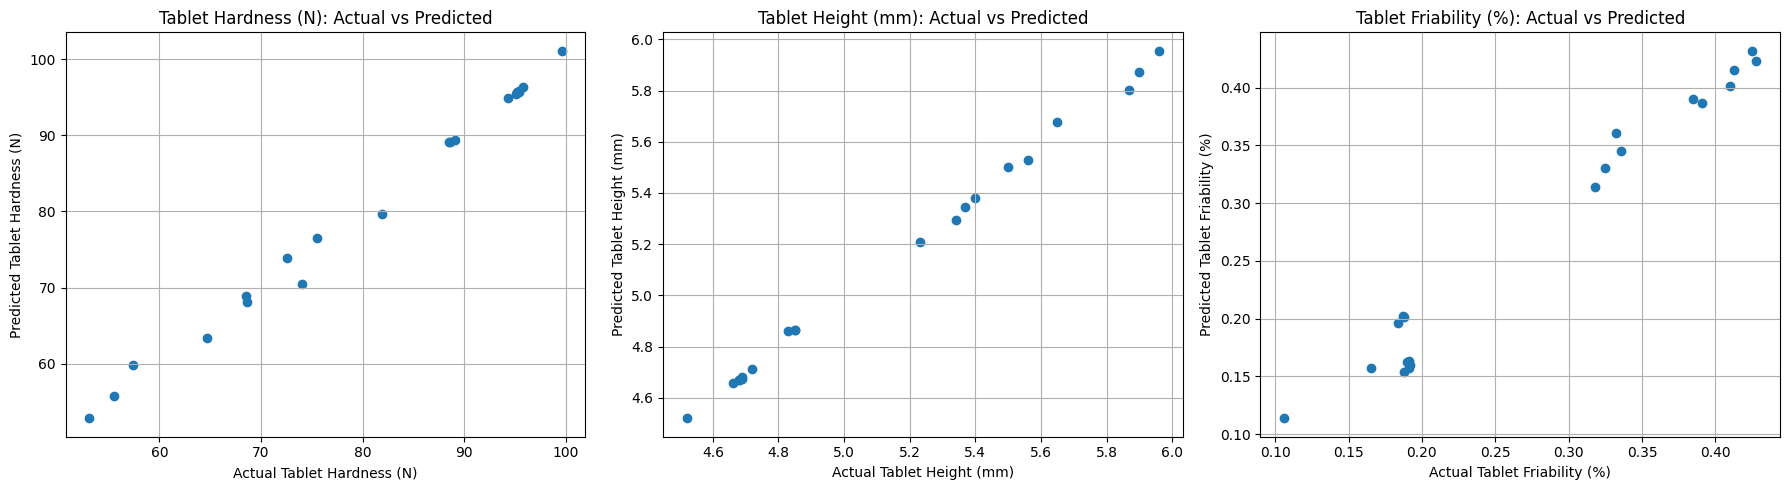

In [98]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for i, col in enumerate(y.columns):
    # print(i, col)
    ax[i].scatter(y_test[col], pred_df[col])
    ax[i].set_xlabel(f'Actual {col}')
    ax[i].set_ylabel(f'Predicted {col}')
    ax[i].set_title(f'{col}: Actual vs Predicted')
    ax[i].grid()
plt.tight_layout()

In [99]:
# Scores
print('Scores:\n')

print('Tablet Hardness Scores:')
print('rmse:', rmse_hardness)
print('r2 score:', r2_hardness)

print('\nTablet Height')
print('rmse:', rmse_height)
print('r2 score:', r2_height)

print('\nTablet Friability')
print('rmse:', rmse_friability)
print('r2 score:', r2_friability)

Scores:

Tablet Hardness Scores:
rmse: 1.277492434216937
r2 score: 0.9926525930904939

Tablet Height
rmse: 0.025566513397828342
r2 score: 0.9970289972225135

Tablet Friability
rmse: 0.18285715195103527
r2 score: 0.969603207229357
